# Visualizing excess deaths


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
excess_deaths_df = pd.read_csv('excess-deaths/deaths.csv')
excess_deaths_df.head()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,Austria,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1814.0,-112.0,2015-2019 historical data
1,Austria,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,1797,1824.0,-27.0,2015-2019 historical data
2,Austria,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,1778,1832.0,-54.0,2015-2019 historical data
3,Austria,NaN,weekly,2020-01-27,2020-02-02,2020,2,5.0,1947,1836.0,111.0,2015-2019 historical data
4,Austria,NaN,weekly,2020-02-03,2020-02-09,2020,2,6.0,1678,1835.0,-157.0,2015-2019 historical data


Isolate to only weekly counts

In [93]:
print(excess_deaths_df['frequency'].value_counts())
excess_deaths_df = excess_deaths_df.loc[excess_deaths_df['frequency'] == 'weekly']
excess_deaths_df['frequency'].value_counts()

weekly     5535
monthly    1177
Name: frequency, dtype: int64


weekly    5535
Name: frequency, dtype: int64

## By Country

In [102]:
# How many countries are we comparing
num_countries = excess_deaths_df['country'].nunique()

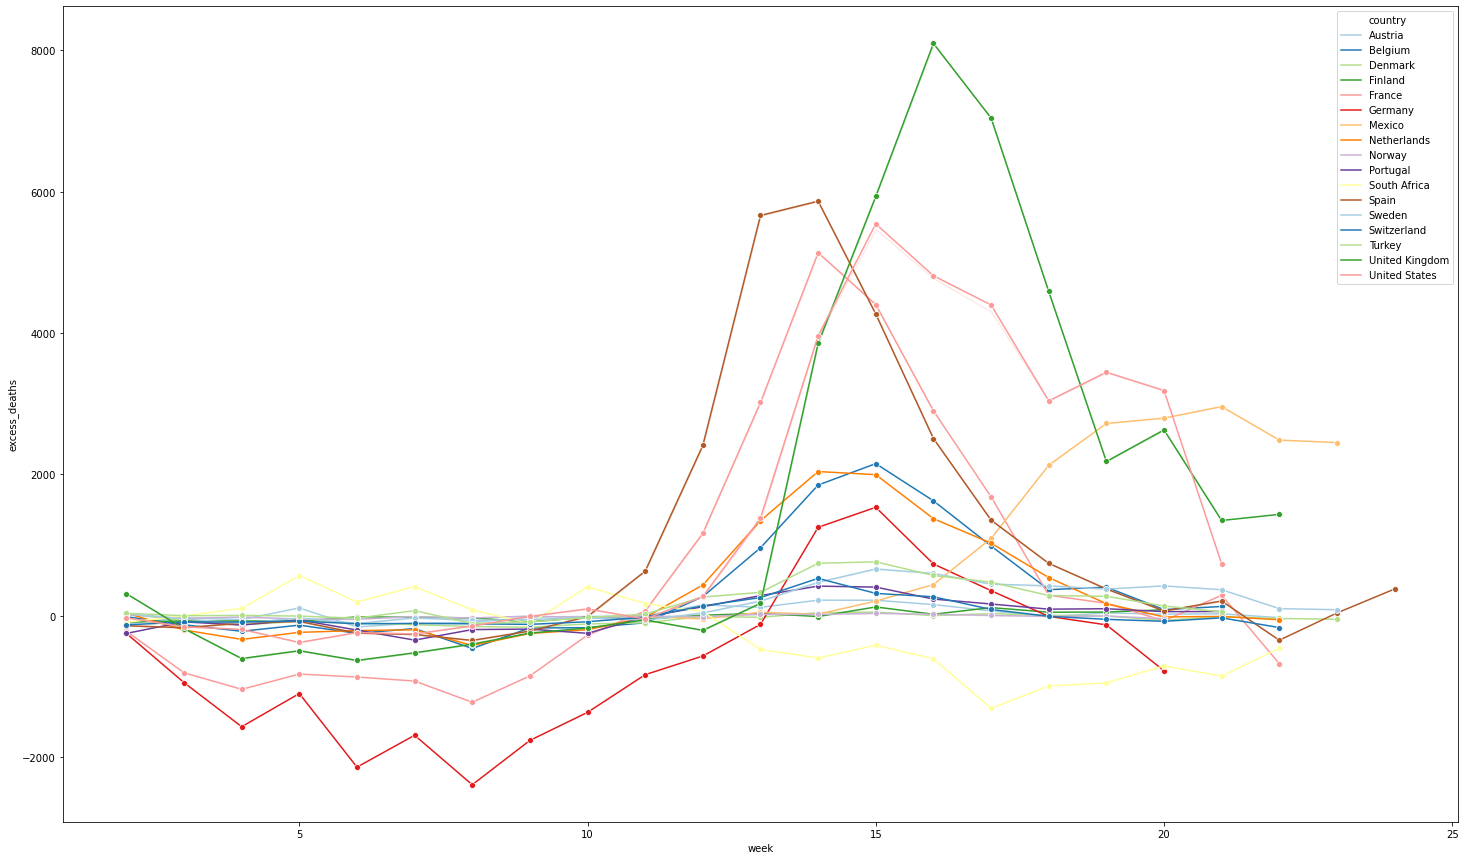

In [106]:
plt.figure(figsize=(25,15))
custom_palette = sns.color_palette("Paired", num_countries)
sns_plot = sns.lineplot(x='week', y='excess_deaths', hue='country', 
                        data=excess_deaths_df, marker = "o", 
                        dashes=False, ci=0.5, palette=custom_palette).get_figure()

In [107]:
# save plot 
sns_plot.savefig("excess_deaths_fig.svg")

## Calculate excess deaths for US

In [108]:
us_deaths = excess_deaths_df.loc[excess_deaths_df['country'] == 'United States']
us_deaths.head()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
5772,United States,Boston,weekly,2015-01-04,2015-01-10,2015,1,2.0,362,NaN,NaN,NaN
5773,United States,Boston,weekly,2015-01-11,2015-01-17,2015,1,3.0,419,NaN,NaN,NaN
5774,United States,Boston,weekly,2015-01-18,2015-01-24,2015,1,4.0,407,NaN,NaN,NaN
5775,United States,Boston,weekly,2015-01-25,2015-01-31,2015,1,5.0,470,NaN,NaN,NaN
5776,United States,Boston,weekly,2015-02-01,2015-02-07,2015,2,6.0,417,NaN,NaN,NaN


In [109]:
sum_excess_us_deaths = us_deaths.groupby(['week'], as_index=False).sum()
sum_excess_us_deaths

,week,month,deaths,expected_deaths,excess_deaths
0,2.0,22,117381,53986.0,-141.0
1,3.0,22,116302,53394.0,-785.0
2,4.0,22,115847,53156.0,-956.0
3,5.0,42,115123,53818.0,-1888.0
4,6.0,44,116005,53786.0,-1185.0
5,7.0,44,114691,53322.0,-1282.0
6,8.0,44,114439,52934.0,-718.0
7,9.0,60,114096,52532.0,-38.0
8,10.0,66,113958,52209.0,491.0
9,11.0,66,112366,51801.0,-229.0


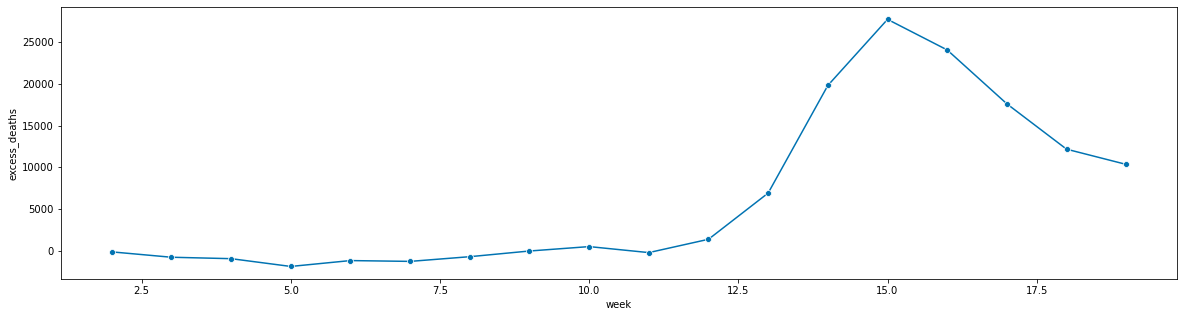

In [110]:
#ignore everything after week 19
sum_excess_us_deaths = sum_excess_us_deaths.loc[sum_excess_us_deaths['week'] <= 19]

plt.figure(figsize=(20,5))
sns_plot = sns.lineplot(x='week', y='excess_deaths',
                        data=sum_excess_us_deaths, marker = "o", 
                        dashes=False, ci=0.5, palette=custom_palette).get_figure()

# Predicting US Excess deaths